# To the Moon
### Using a Linear Regressor and Recurrent Neural Network to forecast Cryptocurrency prices.

Hack@Home 2

Nicholas Lin, Neha Pattanaik, Raghav Khator, Nikitha Seri


# Connecting to Anvil


In [ ]:
!pip install anvil-uplink

     |████████████████████████████████| 61kB 4.0MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-cp37-none-any.whl size=45216 sha256=b53d56730564e15f1e9529aa179af7c77dcf8f5b26d59c35f2657b4b2d3a0c98
  Stored in directory: /root/.cache/pip/wheels/a2/6e/4e/8b0ae12fb9b8a05715256952cf7609a8ab86285fab99b88c68
Successfully built ws4py


In [ ]:
import anvil.server
anvil.server.connect("HD5JPQDE6IAW6OQNF7ZTTT7D-A6DQANVCHGCFT2RD")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


In [407]:
@anvil.server.callable
def predict_coin(date):
  date = str(date)
  if "2016-05-09"<=date<="2021-07-30":
    from six.moves import urllib
    import numpy as np
    import pandas as pd
    url = "https://raw.githubusercontent.com/rk9md/HackatHome2/master/ETHPredictions.csv"
    csv_path = "ETHPredictions.csv"
    urllib.request.urlretrieve(url, csv_path)
    EthTable = pd.read_csv(csv_path, index_col=0)
    return EthTable["Close"][date]


In [ ]:
@anvil.server.callable
def return_plot():
  return time_plot

In [413]:
#litecoin
@anvil.server.callable
def predict_lite(date):
  date = str(date)
  if "2018-10-16"<=date<="2021-07-30":
    from six.moves import urllib
    import numpy as np
    import pandas as pd
    url = "https://raw.githubusercontent.com/rk9md/HackatHome2/master/LTCPredictions.csv"
    csv_path = "LTCPredictions.csv"
    urllib.request.urlretrieve(url, csv_path)
    LtcTable = pd.read_csv(csv_path, index_col=0)
    return LtcTable["Close"][date]

In [412]:
#bitcoin
@anvil.server.callable
def predict_bit(date):
  date = str(date)
  if "2015-10-08"<=date<="2021-07-30":
    from six.moves import urllib
    import numpy as np
    import pandas as pd
    url = "https://raw.githubusercontent.com/rk9md/HackatHome2/master/BTCPredictions.csv"
    csv_path = "BTCPredictions.csv"
    urllib.request.urlretrieve(url, csv_path)
    BtcTable = pd.read_csv(csv_path, index_col=0)
    return BtcTable["Close"][date]

## Explanation

Cryptocurrency is a new asset class that is hoping to change the way finance works today. Bitcoin was the first cryptocurrency and was created as a peer to peer currency. However, with the recent rise in Bitcoin's prices and the nature of its blockchain network, the network fees for sending Bitcoin has skyrocketed and it has turned into a store of value, similar to gold. To solve the problem of high network fees, Litecoin was created. With low network fees, sending Litecoin is cheaper and faster than Bitcoin. Since it is faster and cheaper than Bitcoin, Litecoin is closer to a digital currency than a store of value. Ethereum is another cryptocurrency created on the premise of having programmable money. Ethereum introduced the concept of smart contracts which essentially created strict rules for how tokens and services can be provided over the Ethereum network. All three of these coins are traded daily so we made a machine learning model to predict the prices of the coins through the next 90 days. 

For our project, we used the publicly available dataset from https://www.cryptodatadownload.com/data/gemini/. The dataset contains the market data from the Gemini exchange.

In [ ]:
import sklearn 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pd.set_option('max_colwidth', 400)

seed=42
np.random.seed(seed)

In [362]:
csv_path = "gemini_BTCUSD_day.csv"
usd = pd.read_csv(csv_path)
usd.rename(columns={'Unix Timestamp':'Unix_Timestamp'}, inplace=True)


## Visualizing the Data

The first step we took in creating our predictor was visualizing the data to gain a better understanding of the dataset.

The variables are described below (prices are in USD):

Unix Timestamp - Unix Timestamp of date of trade

Date - Date in EST 

Symbol - Symbol is the coin's ticket

Open - The price of the coin at the opening of the market that day

High - The highest price that the coin was traded for that day

Low - The lowest price that the coin was traded for that day

Close - The price of the coin at the closing time of the market that day

Volume - The amount of the coin traded

In [363]:
usd = usd.sort_values(by=['Unix_Timestamp'], ascending=True)
usd.head(10)

,Unix_Timestamp,Date,Symbol,Open,High,Low,Close,Volume
2032,1.444277e+09,10/8/2015 4:00,BTCUSD,0.00,245.00,0.00,243.60,34.754703
2031,1.444363e+09,10/9/2015 4:00,BTCUSD,243.60,249.97,243.60,245.51,61.587068
2030,1.444450e+09,10/10/2015 4:00,BTCUSD,245.51,246.30,244.60,246.30,30.870549
2029,1.444536e+09,10/11/2015 4:00,BTCUSD,246.30,249.50,245.96,248.98,22.747091
2028,1.444622e+09,10/12/2015 4:00,BTCUSD,248.98,248.98,245.75,245.75,71.047743
2027,1.444709e+09,10/13/2015 4:00,BTCUSD,245.75,252.87,245.75,251.00,154.686596
2026,1.444795e+09,10/14/2015 4:00,BTCUSD,251.00,256.15,250.70,254.59,184.552069
2025,1.444882e+09,10/15/2015 4:00,BTCUSD,254.59,258.98,253.00,257.19,410.961930
2024,1.444968e+09,10/16/2015 4:00,BTCUSD,257.19,285.00,255.90,270.00,552.129457
2023,1.445054e+09,10/17/2015 4:00,BTCUSD,270.00,274.98,267.71,269.26,204.251309


In [364]:
usd.describe()

,Unix_Timestamp,Open,High,Low,Close,Volume
count,2.033000e+03,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000
mean,9.462626e+11,8346.890207,8616.676450,8073.296454,8375.274830,3465.056484
std,7.662909e+11,11250.645616,11644.561215,10840.225414,11302.539419,4115.930522
min,1.444277e+09,0.000000,245.000000,0.000000,243.600000,0.000000
25%,1.488168e+09,1054.410000,1085.510000,1023.580000,1055.000000,1100.412365
50%,1.532060e+12,6420.520000,6555.000000,6330.000000,6420.520000,2098.193968
75%,1.575950e+12,9515.670000,9750.320000,9257.770000,9518.310000,4145.152145
max,1.619840e+12,63773.180000,64900.000000,62045.000000,63773.180000,54142.433520


<class 'matplotlib.text.Text'>


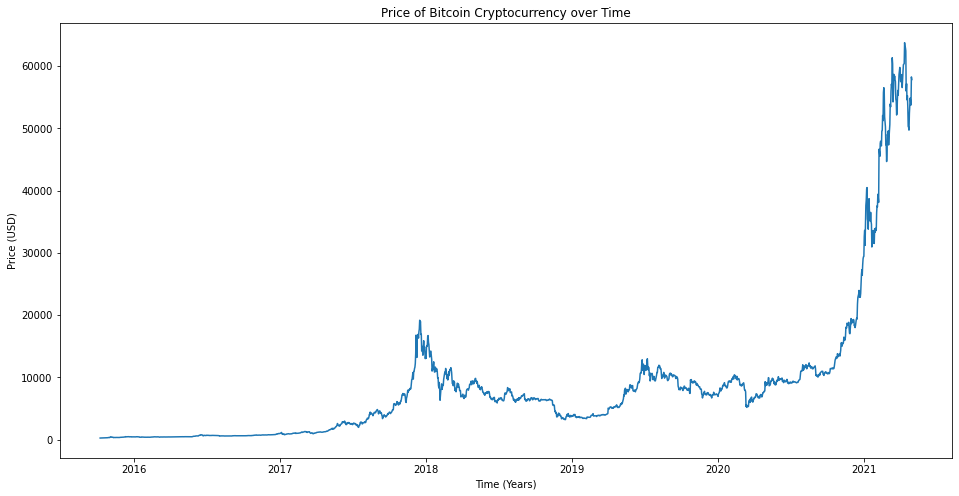

In [366]:
time_plot = plt.figure(figsize=(16,8))
usd['Date'] = pd.to_datetime(usd['Date'])
usd.index = usd['Date']
time_plot = plt.plot(usd['Close'], label='Close Price history')
time_plot = plt.xlabel('Time (Years)')
time_plot = plt.ylabel('Price (USD)')
time_plot = plt.title('Price of Bitcoin Cryptocurrency over Time')
time_plot
print(type(time_plot))

In [ ]:
# We dropped the unix timestamp column which was just a number represented the time and the symbol was all ETHUSD for the pairing
data = usd.copy()
data = data.drop(columns=['Unix_Timestamp', 'Symbol'])
data.columns
#We installed fastai and used the add_datepart to add date features such as dayofweek and dayofyear
from fastai.tabular import  add_datepart
add_datepart(data, 'Date')
data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp


/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())


## Recurrent Neural Network Predictor

For this part, we search up common ways to predict the prices of stocks and we found that a class of Recurrent Neural Network called Long Short-Term Memory which specializes in prediction problems relating to chronological data. 

###Input

In [367]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [368]:
csv_path = "gemini_BTCUSD_day.csv"
df = pd.read_csv(csv_path)
df.rename(columns={'Unix Timestamp':'Unix_Timestamp'}, inplace=True)
df = df.sort_values(by=['Unix_Timestamp'], ascending=True)

In [369]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_axis(df['Date'], inplace=True)
df.drop(columns=['Open', 'High', 'Low', 'Volume', 'Symbol', 'Unix_Timestamp'], inplace=True)
df

,Date,Close
Date,,
2015-10-08 04:00:00,2015-10-08 04:00:00,243.60
2015-10-09 04:00:00,2015-10-09 04:00:00,245.51
2015-10-10 04:00:00,2015-10-10 04:00:00,246.30
2015-10-11 04:00:00,2015-10-11 04:00:00,248.98
2015-10-12 04:00:00,2015-10-12 04:00:00,245.75
...,...,...
2021-04-27 04:00:00,2021-04-27 04:00:00,54883.25
2021-04-28 04:00:00,2021-04-28 04:00:00,54312.41
2021-04-29 04:00:00,2021-04-29 04:00:00,53750.01


In [370]:
close_data = df['Close'].values
close_data = close_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(close_data))

close_train = close_data[:split]
close_test = close_data[split:]

date_train = df['Date'][:split]
date_test = df['Date'][split:]

print(len(close_train))
print(len(close_test))

1626
407


###Model Training

In [371]:
look_back = 30

train_generator = TimeseriesGenerator(close_train, close_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(close_test, close_test, length=look_back, batch_size=1)

In [377]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(180,activation='relu',input_shape=(look_back,1),return_sequences=True))
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 15
model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
80/80 [==============================] - 8s 72ms/step - loss: 421544606.6173
Epoch 2/15
80/80 [==============================] - 6s 71ms/step - loss: 182468749.9259
Epoch 3/15
80/80 [==============================] - 6s 71ms/step - loss: 26515729.0849
Epoch 4/15
80/80 [==============================] - 6s 71ms/step - loss: 22288469.7037
Epoch 5/15
80/80 [==============================] - 6s 71ms/step - loss: 7622903.8519
Epoch 6/15
80/80 [==============================] - 6s 73ms/step - loss: 5871309.2404
Epoch 7/15
80/80 [==============================] - 6s 72ms/step - loss: 24645760.4105
Epoch 8/15
80/80 [==============================] - 6s 70ms/step - loss: 7450061.6605
Epoch 9/15
80/80 [==============================] - 6s 71ms/step - loss: 4321386.2253
Epoch 10/15
80/80 [==============================] - 6s 72ms/step - loss: 2275272.1698
Epoch 11/15
80/80 [==============================] - 6s 72ms/step - loss: 2164075.6636
Epoch 12/15
80/80 [==========================

In [378]:
prediction = model.predict_generator(test_generator)
prediction

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


array([[ 6813.564 ],
       [ 6781.082 ],
       [ 7146.087 ],
       [ 7137.5845],
       ...,
       [58653.02  ],
       [59108.66  ],
       [57183.848 ],
       [62058.48  ]], dtype=float32)

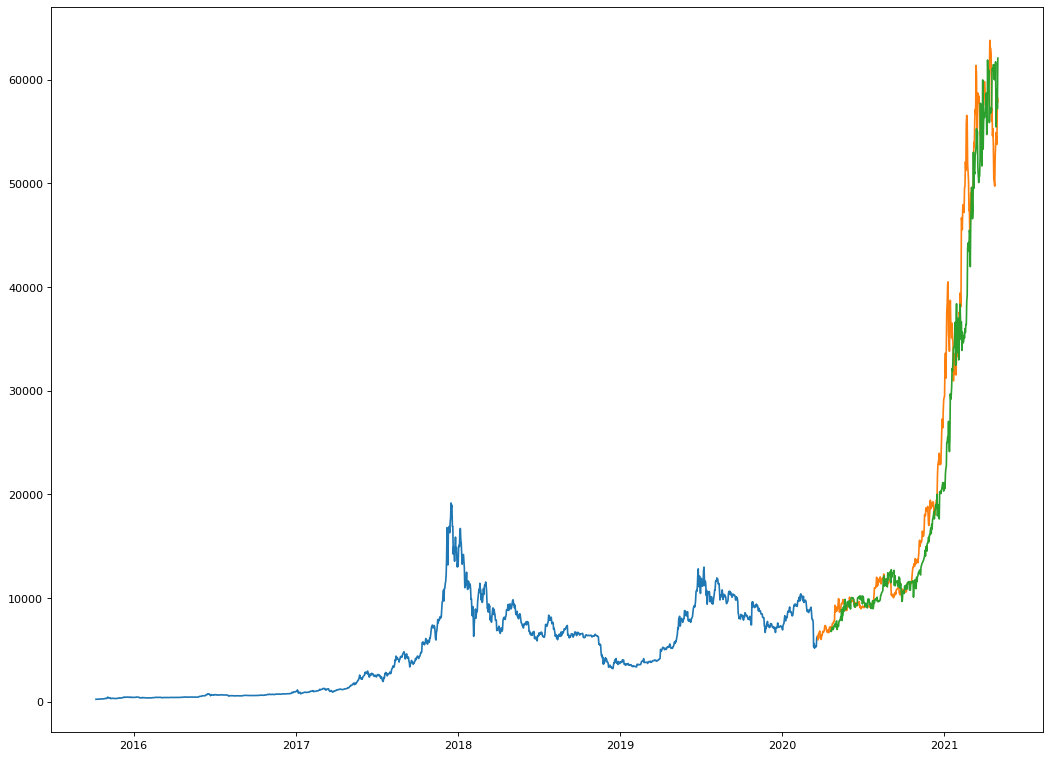

In [379]:
from matplotlib.pyplot import figure

figure(figsize=(16,12), dpi=80)
plt.plot(date_train, close_train)

plt.plot(date_test, close_test)

plt.plot(date_test[look_back:], prediction)

In [380]:
close_data = close_data.reshape((-1))

def predict(num_prediction, model):
    prediction_list = close_data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list
    
def predict_dates(num_prediction):
    last_date = df['Date'].values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

num_prediction = 90
forecast = predict(num_prediction, model)
forecast_dates = predict_dates(num_prediction)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


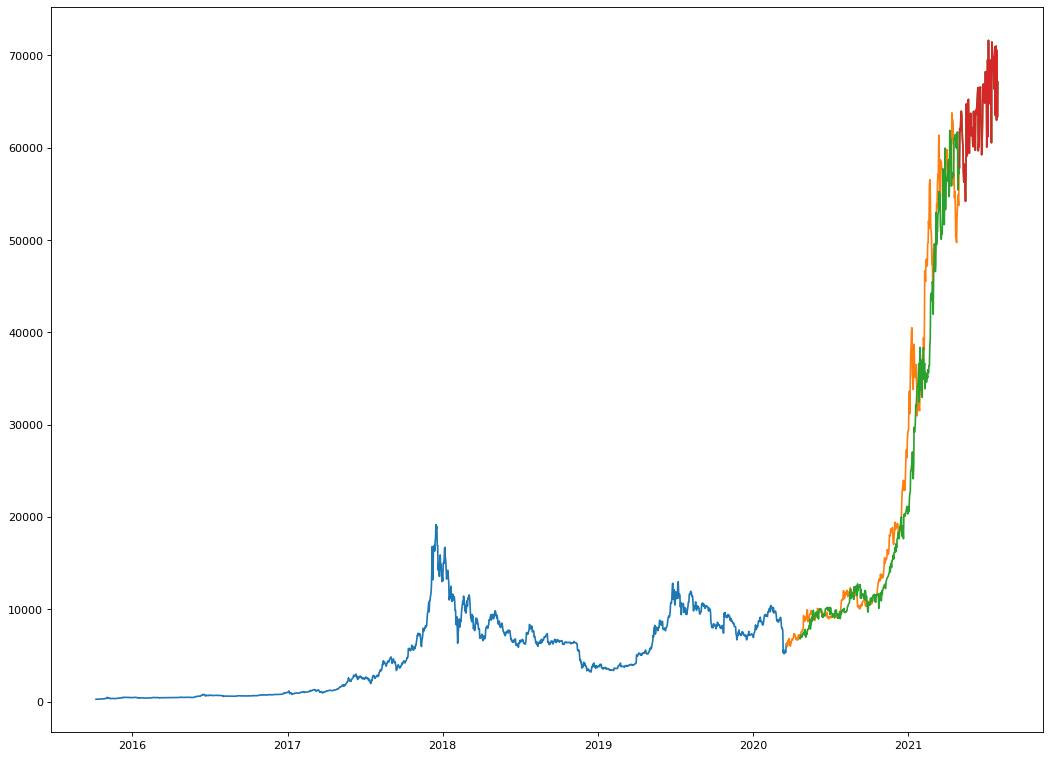

In [381]:
from matplotlib.pyplot import figure

figure(figsize=(16,12), dpi=80)


plt.plot(date_train, close_train)

plt.plot(date_test, close_test)

#plt.plot(date_test[look_back:], prediction)

plt.plot(list(date_test[look_back:]) + forecast_dates[1:], list(prediction)+list(forecast[1:]))
plt.plot(forecast_dates, forecast)

###Data Generation


In [382]:
forecastDF = pd.DataFrame()
forecastDF["Date"] = forecast_dates
forecastDF["Close"] = forecast
forecastDF.set_axis(forecastDF['Date'], inplace=True)
forecastDF

,Date,Close
Date,,
2021-05-01 04:00:00,2021-05-01 04:00:00,57847.730000
2021-05-02 04:00:00,2021-05-02 04:00:00,62075.179688
2021-05-03 04:00:00,2021-05-03 04:00:00,61829.171875
2021-05-04 04:00:00,2021-05-04 04:00:00,63263.035156
2021-05-05 04:00:00,2021-05-05 04:00:00,63955.328125
...,...,...
2021-07-26 04:00:00,2021-07-26 04:00:00,71005.320312
2021-07-27 04:00:00,2021-07-27 04:00:00,62986.644531
2021-07-28 04:00:00,2021-07-28 04:00:00,70543.796875


In [383]:
forecastDF.drop("Date", axis=1).to_csv("fore.csv")

In [384]:
df.drop("Date", axis=1).to_csv("pre.csv")

## Anvil Wait Forever

In [ ]:
anvil.server.wait_forever()